# What is Principal Component Analysis?

Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the analysis of gene expression data, and many more.

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10, 10))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset into a pandas dataframe
df = pd.read_csv("Wine.csv")

In [3]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [4]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


<h4>So Dependent Variable of the dataset is splitted into 3 classes namely(1, 2, 3)</h4>

In [5]:
df.shape

(178, 14)

In [6]:
X = df.iloc[:, 0:13].values
Y = df.iloc[:, 13].values

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [8]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (142, 13)
Size of X_test: (36, 13)
Size of Y_train: (142,)
Size of Y_test: (36,)


In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We can see that First Two has the highest variance
So, we will set out n_components in PCA as 2

In [11]:
#Checking The Variances 
Variances = pca.explained_variance_
Variances

array([4.82894083, 2.52920254])

In [10]:
# Applying PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Predicting The Results
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [14]:
#Comparing the results
cm = confusion_matrix(Y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [15]:
#Checking The Accuracy score
acc = accuracy_score(Y_test, y_pred)
print("The Accuracy on the model is: {}%".format((acc*100).astype('int32')))

The Accuracy on the model is: 97%


<h3>Building a text report showing the main classification metrics</h3>

In [16]:
cr = classification_report(Y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



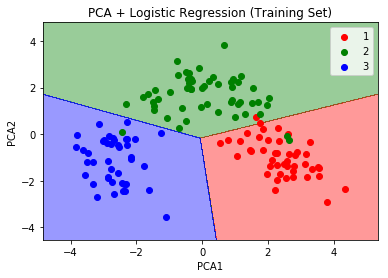

In [17]:
# Visualising the Training set results
x_set, y_set = X_train, Y_train

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("PCA + Logistic Regression (Training Set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

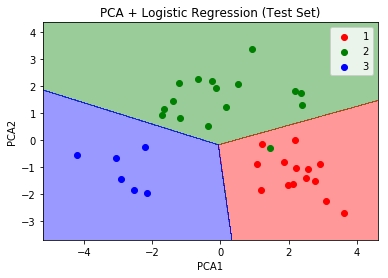

In [18]:
# Visualising the Test set results
x_set, y_set = X_test, Y_test

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("PCA + Logistic Regression (Test Set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()